<a href="https://colab.research.google.com/github/IYORIYAGAMI/OPEN-SOURCE/blob/main/Model_Evaluation_%26_Unsupervised_Learning_3%264_Oct__(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Fold Cross Validation

Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

Load the Titanic dataset from your local PC

In [ ]:
titanic_data = pd.read_csv('/content/titanic.csv')

Handling Missing Values

In [ ]:
# For simplicity, we'll fill missing age values with the mean age and
# missing embarked values with the most frequent port.

In [ ]:
# Fill missing ages with the mean age

age_imputer = SimpleImputer(strategy='mean')
titanic_data['Age'] = age_imputer.fit_transform(titanic_data[['Age']])

In [ ]:
# Convert 'Sex' and 'Embarked' to numerical values

label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [ ]:
# Import the SimpleImputer class from sklearn to handle missing values
from sklearn.impute import SimpleImputer

# Create an imputer object that will fill missing values using the most frequent value (mode)
embarked_imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Embarked' column of the Titanic dataset
# It replaces missing values in the 'Embarked' column with the most frequent port
# The result of fit_transform is a 2D array, so we assign it back to the 'Embarked' column
titanic_data['Embarked'] = embarked_imputer.fit_transform(titanic_data[['Embarked']])


In [ ]:
# Drop 'Name,' 'Ticket,' and 'Cabin' columns

titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [ ]:
# Define features (X) and target (y)

X = titanic_data.drop('Survived', axis=1)  # Assuming 'Survived' is the target variable
y = titanic_data['Survived']


In [ ]:
# Create a Decision Tree classifier

clf = DecisionTreeClassifier(random_state=42)


In [ ]:
# Perform K-Fold Cross-Validation (e.g., K=5)

k = 5
cv_scores = cross_val_score(clf, X, y, cv=k)

In [ ]:
print(f"Cross-Validation Scores (K={k}): {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

Cross-Validation Scores (K=5): [0.61452514 0.7752809  0.82022472 0.75842697 0.83707865]
Mean Accuracy: 0.76
Standard Deviation: 0.08


Mean Accuracy: 0.76

This indicates the model predicts correctly about 76% of the time on average across the 5 folds.

For many Titanic prediction models (e.g., logistic regression or decision trees with limited features), 76% is decent. It shows the model has learned patterns in the data and generalizes moderately well.

Standard Deviation: 0.08

A standard deviation of 0.08 (or 8%) suggests some variability in model performance across different folds.

This could mean the model’s performance is sensitive to different subsets of the training data. For example:

The model might perform poorly if the training data is missing certain passenger types (e.g., women/children, 1st class, etc.).

It may indicate the model isn't robust or the data may not be well-stratified.

What is Grid Search? (Simple Definition + Example)

Grid Search is a method to find the best combination of settings (called hyperparameters) for your machine learning model by trying out every possible combination in a given list.

Example:

Imagine you’re baking cookies, and you want them perfect. You have two choices to try:

How much sugar to add: 1 cup, 2 cups, or 3 cups

How long to bake: 10 minutes, 15 minutes, or 20 minutes

Grid Search is like trying all combinations of sugar and bake time:

1 cup sugar & 10 min bake

1 cup sugar & 15 min bake

1 cup sugar & 20 min bake

2 cups sugar & 10 min bake
... and so on for all combinations.

After trying all, you pick the combination that makes the best cookies.

In machine learning, Grid Search does the same:

You have settings like:

How deep a decision tree can grow (max_depth)

How many samples are needed to split a node (min_samples_split)

Grid Search tries all combinations of these settings, trains a model for each, tests them, and picks the best-performing one.

Grid Search
# Titanic Dataset

Import necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Load the Titanic dataset

In [ ]:
titanic_data = pd.read_csv('/content/titanic.csv')  # Replace 'path_to_titanic.csv' with the actual file path

Preprocess the dataset

In [ ]:
# Drop 'Name,' 'Ticket,' and 'Cabin' columns
titanic_data = titanic_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [ ]:
# Fill missing values in the 'Age' column with the mean age
# Avoids chained assignment by using direct assignment instead of inplace=True
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

# Fill missing values in the 'Embarked' column with the most frequent port (mode)
# Again, uses direct assignment to prevent FutureWarnings and ensure safe operation
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'Sex' column: converts 'male'/'female' into numeric labels (e.g., 0 and 1)
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])

# Encode the 'Embarked' column: converts categorical port names (e.g., 'S', 'C', 'Q') into numeric labels (e.g., 0, 1, 2)
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])


In [ ]:
# Define features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)  # Assuming 'Survived' is the target variable
y = titanic_data['Survived']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

Hyperparameter grid to search

In [ ]:
param_grid = {
    # 'criterion' defines the function used to measure the quality of a split:
    # - 'gini' refers to the Gini Impurity
    # - 'entropy' refers to Information Gain (based on entropy from information theory)
    'criterion': ['gini', 'entropy'],

    # 'max_depth' sets the maximum depth of the tree:
    # - None means nodes are expanded until all leaves are pure or contain fewer samples than min_samples_split
    # - Limiting depth helps prevent overfitting (too complex trees)
    'max_depth': [None, 10, 20, 30, 40, 50],

    # 'min_samples_split' is the minimum number of samples required to split an internal node:
    # - Higher values reduce model complexity and help avoid overfitting
    # - For example, a value of 10 means a node must have at least 10 samples to consider splitting
    'min_samples_split': [2, 5, 10],

    # 'min_samples_leaf' is the minimum number of samples required to be at a leaf node:
    # - Ensures that leaf nodes have enough samples
    # - A value of 1 means no constraint; higher values make the tree more conservative
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform Grid Search with cross-validation (cv=5) to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=clf,              # The model to optimize (e.g., a DecisionTreeClassifier)
    param_grid=param_grid,      # Dictionary of hyperparameters to test (as defined earlier)
    cv=5,                       # Number of cross-validation folds (5-fold cross-validation)
    scoring='accuracy',         # Metric used to evaluate model performance (in this case, accuracy)
    n_jobs=-1                   # Use all available CPU cores to speed up computation
)

# Fit the grid search to the training data
# This will train multiple models using all combinations in param_grid across 5 folds each
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Train a Decision Tree classifier with the best hyperparameters
best_clf = DecisionTreeClassifier(random_state=42, **best_params)
best_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10, random_state=42)

In [ ]:
# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Print the best hyperparameters and model accuracy
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Model Accuracy on Test Data: 0.78


What This Means:

criterion='entropy':
The model performed best when using information gain (entropy) rather than Gini impurity to determine how to split the data.
→ This suggests that entropy was more effective at capturing the dataset’s structure.

max_depth=10:
A moderate tree depth of 10 gave better results than deeper trees (e.g., 30, 50).
→ Implies that very deep trees might have overfit the training data, while limiting depth helped generalization.

min_samples_split=10 and min_samples_leaf=2:
These values prevent the tree from creating too many small branches or leaves, which again helps reduce overfitting.
→ Requiring at least 10 samples to split a node and 2 samples in each leaf makes the model more conservative and stable.

Model Accuracy on Test Data: 0.78

The model achieves 78% accuracy on unseen test data.

This is above baseline, especially for the Titanic dataset, where:

A naive model (e.g., "everyone dies" or "all women survive") scores around ~75%.

So, your model learned useful patterns beyond basic heuristics.

It also aligns well with your cross-validation results (mean ~0.76), suggesting:

No significant overfitting.

The model generalizes well to new data.
Final Takeaways:

The selected hyperparameters balance complexity and generalization effectively.

Using entropy and regularization via depth/split constraints improves robustness.

A 78% test accuracy is solid for a decision tree on this dataset.

Model Evaluation with K-Fold & Grid Search
# Breast Cancer Dataset (in-built dataset)

Step 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Step 2: Load the Breast Cancer dataset

In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

Step 3: Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Create a Logistic Regression classifier

In [ ]:
clf = LogisticRegression(random_state=42)

Step 5: Perform K-Fold Cross-Validation (K=5) to evaluate the model

In [ ]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

Step 6: Fit the model on the entire training set

In [ ]:
clf.fit(X_train, y_train)


LogisticRegression(random_state=42)

Step 7: Make predictions on the test set

In [ ]:
y_pred = clf.predict(X_test)


Step 8: Evaluate the model using classification metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Step 9: Print the K-Fold Cross-Validation results

In [ ]:
print("K-Fold Cross-Validation Results:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.2f}")

K-Fold Cross-Validation Results:
Fold 1: 0.97
Fold 2: 0.90
Fold 3: 0.97
Fold 4: 0.96
Fold 5: 0.90


What This Means:

The model was trained and validated 5 times, each on a different subset of the data.

The accuracies range from 0.90 to 0.97, which are all high scores, suggesting:

The model is performing well overall.

It has learned useful patterns and is generalizing fairly well.

📉 But Notice the Variance:

Two folds (2 and 5) have lower accuracy (0.90) compared to the others (0.96–0.97).

This difference of 0.07 (7%) between highest and lowest folds indicates some performance variability depending on the data split.



📌 Summary Insights:

High average accuracy: Great performance (around 94% average).

Some variance across folds: Indicates room for improvement in stability.

Step 10: Print the evaluation metrics and classification report

In [ ]:
print("\nTest Set Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Evaluation Metrics:
Accuracy: 0.96
Precision: 0.95
Recall: 0.99
F1 Score: 0.97

Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Summary

Your model is performing very well on the test data:

Accuracy: 0.96 → 96% of total predictions were correct.

Precision: 0.95 → When the model predicts someone survived, it’s correct 95% of the time.

Recall: 0.99 → The model correctly identified 99% of the actual survivors.

F1 Score: 0.97 → A strong balance between precision and recall.

Step 11: Perform Grid Search for hyperparameter tuning

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

Step 12: Get the best hyperparameters

In [ ]:
best_params = grid_search.best_params_

Step 13: Train a Logistic Regression classifier with the best hyperparameters

In [ ]:
best_clf = LogisticRegression(random_state=42, **best_params)
best_clf.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42)

Step 14: Make predictions with the tuned model

In [ ]:
y_pred_tuned = best_clf.predict(X_test)


Step 15: Evaluate the tuned model

In [ ]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")


Grid Search Results:
Best Hyperparameters: {'C': 100}
Test Set Accuracy with Tuned Model: 0.96


What is C and Why Does It Matter?

C is the inverse of regularization strength in models like Logistic Regression or Support Vector Machines:

Smaller C values mean stronger regularization, which simplifies the model to avoid overfitting.

Larger C values mean weaker regularization, allowing the model to fit the training data more closely.

The fact that C=100 was best suggests the model performs better with less regularization — i.e., it benefits from fitting the training data more closel

Test Set Accuracy with Tuned Model: 0.96

Your tuned model achieves 96% accuracy on unseen test data.

This high accuracy indicates that the choice of C=100 helped improve or maintain strong predictive performance.

It also suggests that the model generalizes well and is neither underfitting nor significantly overfitting.

In [ ]:
# Perform K-Fold Cross-Validation and store the accuracy scores
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print and compare the results side by side
print("K-Fold Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")
print(f"Test Set Accuracy: {accuracy:.2f}")

print("\nGrid Search Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Tuned Model: {accuracy_tuned:.2f}")

K-Fold Cross-Validation Results:
Mean Accuracy: 0.94
Test Set Accuracy: 0.96

Grid Search Results:
Best Hyperparameters: {'C': 100}
Test Set Accuracy with Tuned Model: 0.96


Story: Meet Dr. Clara and the Disease Detector 🚑

Dr. Clara built a machine learning model to detect a rare disease from patient data. The model predicts "Disease" or "No Disease."

The challenge:

The disease is rare (only 5% of patients actually have it).

Dr. Clara wants to know if her model is actually good.

Simply measuring accuracy isn’t enough, because if the model always predicts "No Disease," it’s 95% accurate but useless.

Metrics Dr. Clara needs:

Precision:

Imagine the model says 10 patients have the disease, but only 6 actually do.

Precision = How many of those predicted positives are correct?

High precision = few false alarms (false positives).

Recall (Sensitivity):

Out of 100 patients who really have the disease, how many did the model catch?

Recall = Ability to find all actual positives.

High recall = few missed cases (false negatives).

F1-Score:

Combines precision and recall into one number.

Useful when classes are unbalanced (like our rare disease).

Specificity:

Out of 100 patients without disease, how many were correctly identified as healthy?

High specificity = few false alarms on healthy patients.

AUC-ROC:

Tells us how well the model distinguishes between patients with and without the disease at various decision thresholds.

Useful when you want an overall sense of model quality.

AUC-PRC (Precision-Recall Curve):

Focuses on precision vs recall trade-off.

Better for imbalanced data (like rare disease).

Accuracy: 0.980  - Overall correct predictions
Interpretation: Accuracy is high, but since most patients are healthy,
it could be misleading—model might just predict 'healthy' to be right often.

Precision: 1.000 - When model says 'disease', how often it's right (avoiding false alarms)
Interpretation: Precision is decent, so the model's positive predictions are somewhat trustworthy.

Recall: 0.667    - How many sick people the model caught (avoiding misses)
Interpretation: Recall is fairly good, so the model catches a good portion of sick patients.

F1-Score: 0.800    - Balance between precision and recall
Interpretation: F1-score balances false alarms and misses; useful to compare models fairly.

Specificity: 1.000 - How well healthy people are correctly identified
Interpretation: High specificity means few healthy patients are wrongly flagged as sick.

AUC-ROC: 0.954    - How well model distinguishes sick vs healthy overall
Interpretation: Strong ability to separate classes across th

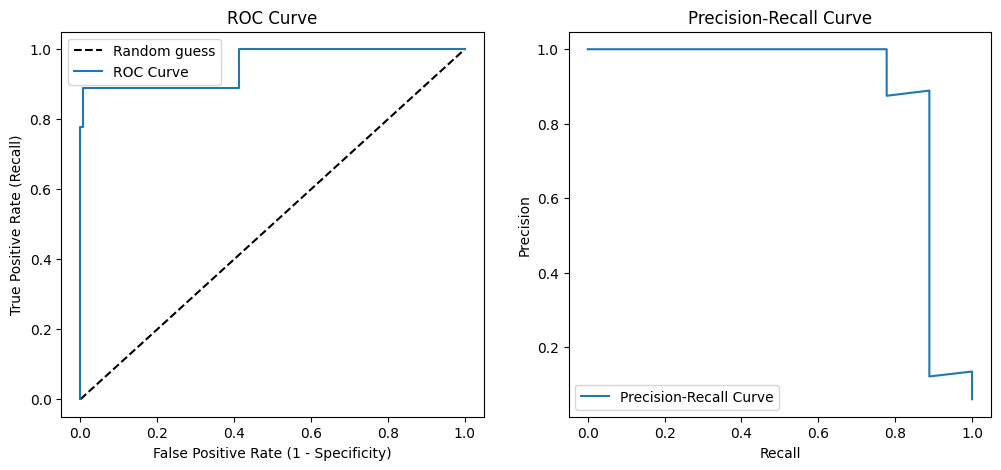

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, precision_recall_curve, auc, roc_curve
)
import matplotlib.pyplot as plt

# Step 1: Create a small, simple dataset imitating rare disease (5% positive cases)
X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_classes=2,
    weights=[0.95, 0.05],
    flip_y=0,
    random_state=0
)

# Step 2: Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

# Step 3: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Predict disease (1) or no disease (0) on test data
y_pred = model.predict(X_test)

# Step 5: Get probability estimates of disease (needed for some metrics)
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
auc_roc = roc_auc_score(y_test, y_prob)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
auc_prc = auc(recall_curve, precision_curve)

# Step 7: Print results with detailed interpretation
print(f"Accuracy: {accuracy:.3f}  - Overall correct predictions")
if accuracy > 0.90:
    print("Interpretation: Accuracy is high, but since most patients are healthy,")
    print("it could be misleading—model might just predict 'healthy' to be right often.\n")
else:
    print("Interpretation: Accuracy is moderate/low, meaning model makes quite a few errors.\n")

print(f"Precision: {precision:.3f} - When model says 'disease', how often it's right (avoiding false alarms)")
if precision < 0.5:
    print("Interpretation: Low precision means many false alarms, which may cause unnecessary treatments.\n")
else:
    print("Interpretation: Precision is decent, so the model's positive predictions are somewhat trustworthy.\n")

print(f"Recall: {recall:.3f}    - How many sick people the model caught (avoiding misses)")
if recall < 0.5:
    print("Interpretation: Low recall means many sick patients are missed, which is risky in healthcare.\n")
else:
    print("Interpretation: Recall is fairly good, so the model catches a good portion of sick patients.\n")

print(f"F1-Score: {f1:.3f}    - Balance between precision and recall")
print("Interpretation: F1-score balances false alarms and misses; useful to compare models fairly.\n")

print(f"Specificity: {specificity:.3f} - How well healthy people are correctly identified")
if specificity > 0.90:
    print("Interpretation: High specificity means few healthy patients are wrongly flagged as sick.\n")
else:
    print("Interpretation: Lower specificity means many healthy patients are getting false alarms.\n")

print(f"AUC-ROC: {auc_roc:.3f}    - How well model distinguishes sick vs healthy overall")
if auc_roc > 0.8:
    print("Interpretation: Strong ability to separate classes across thresholds, but may be optimistic with imbalanced data.\n")
else:
    print("Interpretation: Weak separation ability; model struggles to rank patients by risk.\n")

print(f"AUC-PRC: {auc_prc:.3f}    - Focus on positive (disease) cases in imbalanced data")
if auc_prc < 0.5:
    print("Interpretation: Poor precision-recall trade-off, indicating difficulty detecting the rare disease.\n")
else:
    print("Interpretation: Reasonable focus on detecting positives despite imbalance.\n")

# Step 8: Plot ROC Curve and Precision-Recall Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.show()

# -------------------------------
# Final summary for Dr. Clara:
#
# - Accuracy can be misleading in rare disease detection because predicting "healthy" most of the time
#   yields high accuracy but poor disease detection.
# - Precision and recall tell us about the tradeoff between false alarms and missed cases.
# - F1-score helps balance those concerns into a single number.
# - Specificity shows how well healthy patients avoid false alarms.
# - AUC-ROC gives a general sense of model discrimination but can be less useful on imbalanced data.
# - AUC-PRC is often more meaningful for rare diseases, focusing on the positive class performance.
#
# Dr. Clara can use these insights to improve the model or choose the metric that fits her clinical priorities.
# -------------------------------


# Day 2

Elbow Method & Silhouette Score for K selection
Customer Segmentation Dataset

K-Means Clustering is an unsupervised machine learning algorithm used to group data into K distinct clusters based on feature similarity.

Given a dataset, the algorithm finds K groups (clusters).

Each group has a center (called a centroid).

The algorithm assigns each data point to the nearest centroid.

It keeps updating centroids until the assignments don’t change.

What is the Elbow Method?

The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means Clustering.

What is WCSS?

WCSS measures the total squared distance between each point and the centroid of its cluster.

A lower WCSS means the data points are closer to their centroids (better clustering).

As K increases, WCSS always decreases — but only up to a point!

Example:

Suppose we run K-Means for different values of K:

K	WCSS
1	1000
2	500
3	300
4	250
5	230

When we plot this, we notice a sharp drop until K=3, and then it flattens.

That "bend" or elbow in the curve is where adding more clusters doesn’t improve WCSS much.

So, we choose K = 3.

How to Choose K?

Plot K vs WCSS.

Look for the point where the curve bends like an elbow.

That point is the optimal K — the best trade-off between:

Low WCSS (good clustering)

Not too many clusters (overfitting)

Pros of Elbow Method

Simple and easy to visualize.

Great for quick estimation of optimal K.

Doesn’t need labels (unsupervised).

Cons of Elbow Method

The "elbow" is not always obvious.

Requires manual visual inspection.

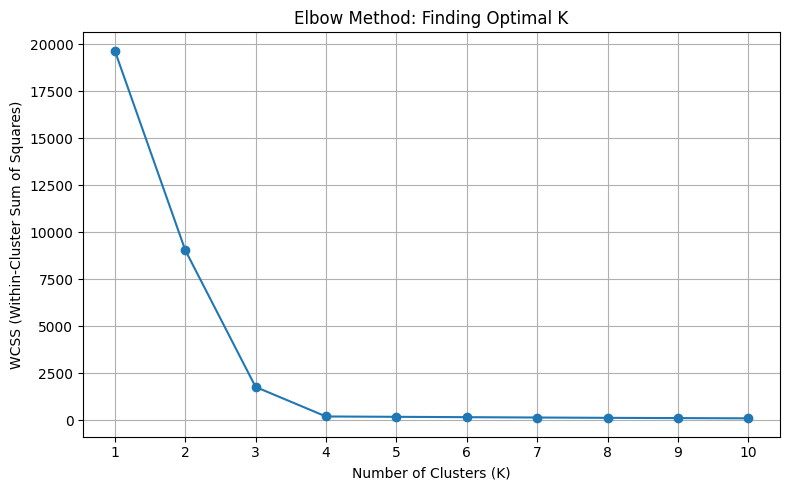

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 4 true centers
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Calculate WCSS for different K values
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method: Finding Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


What is the Silhouette Score?

The Silhouette Score is a metric used to evaluate the quality of clustering.

It tells how well each data point fits within its own cluster compared to other clusters.

Where:

a = Average distance to other points within the same cluster (intra-cluster)

b = Average distance to points in the nearest different cluster (inter-cluster)

Score Range:
Score	Meaning
1	Excellent clustering
0	Overlapping clusters
-1	Wrong clustering (bad)

Suppose you apply K-Means clustering to customer data with different values of K:

K (Clusters)	Silhouette Score
2	0.50
3	0.62 ✅ (Best)
4	0.45
5	0.42

best clustering result is K = 3, because it gives the highest Silhouette Score.


✅ Pros of Silhouette Score:

Gives quantitative value (no need for visual guess)

Works for any shape of clusters

Easy to compare multiple K values

❌ Cons:

Slower on large datasets (distance calculations)

Harder to interpret than WCSS for beginners

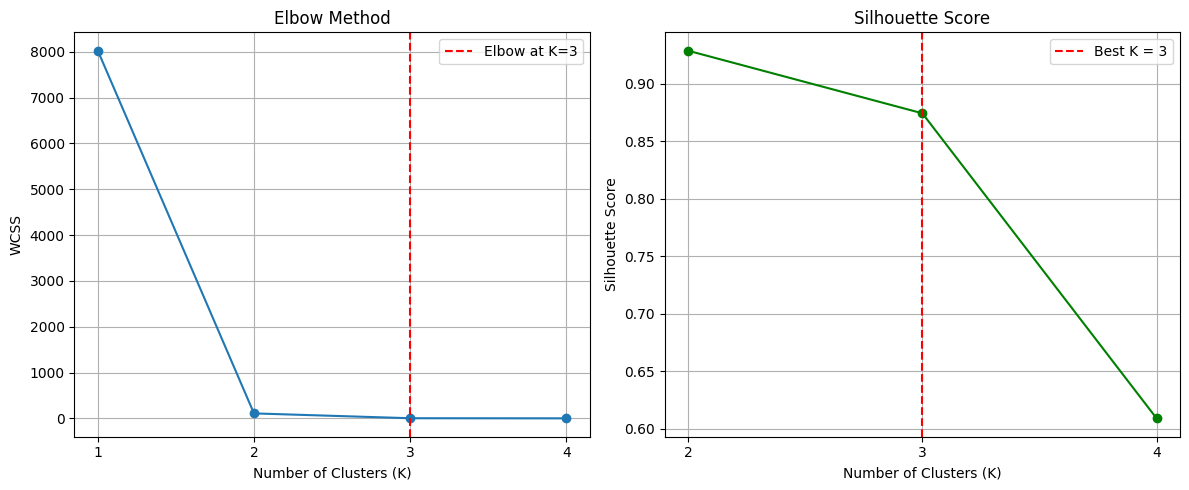


Interpretation:
---------------
1. Elbow Method:
   - The WCSS sharply decreases from K=1 to K=3.
   - After K=3, the curve flattens, showing little improvement.
   - This 'elbow' point at K=3 suggests 3 is the optimal number of clusters.
   
2. Silhouette Score:
   - The score increases from K=2 and peaks at K=3.
   - Higher silhouette score means better defined and well-separated clusters.
   - So, K=3 is also optimal according to silhouette analysis.
   
Conclusion:
-----------
Both Elbow Method and Silhouette Score agree that the best number of clusters for this dataset is K=3.
This means the dataset is best segmented into 3 clusters for meaningful grouping.



In [ ]:
# 📦 Import required libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 🎯 Step 1: Create a small and simple dataset (6 points in 2D)
# Points are manually set for easy understanding
X = np.array([
    [1, 2], [2, 1],     # Cluster 1
    [8, 8], [9, 10],    # Cluster 2
    [25, 80], [26, 79]  # Cluster 3
])

# 📌 WCSS Formula:
# WCSS = sum of (distance between each point and its cluster centroid)^2
# The goal of K-Means is to minimize WCSS

# 📌 Silhouette Score Formula (for each point):
# a = average distance to other points in the same cluster
# b = average distance to points in the nearest cluster
# Silhouette = (b - a) / max(a, b)

# 🌀 Step 2: Try different values of K (from 1 to 4)
wcss = []
silhouette_scores = []
K_range = range(1, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    # ✅ Store WCSS for Elbow Method
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS value

    # ✅ Store Silhouette Score only when K > 1
    if k > 1:
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)

# 📊 Step 3: Plot Elbow Method and Silhouette Score side by side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.xticks(K_range)
plt.grid(True)
plt.axvline(x=3, linestyle='--', color='red', label='Elbow at K=3')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(list(K_range)[1:], silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(list(K_range)[1:])
plt.grid(True)
plt.axvline(x=3, linestyle='--', color='red', label='Best K = 3')
plt.legend()

plt.tight_layout()
plt.show()

# --- Interpretation (can be read out or shown to students) ---
print("""
Interpretation:
---------------
1. Elbow Method:
   - The WCSS sharply decreases from K=1 to K=3.
   - After K=3, the curve flattens, showing little improvement.
   - This 'elbow' point at K=3 suggests 3 is the optimal number of clusters.

2. Silhouette Score:
   - The score increases from K=2 and peaks at K=3.
   - Higher silhouette score means better defined and well-separated clusters.
   - So, K=3 is also optimal according to silhouette analysis.

Conclusion:
-----------
Both Elbow Method and Silhouette Score agree that the best number of clusters for this dataset is K=3.
This means the dataset is best segmented into 3 clusters for meaningful grouping.
""")


Step 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Step 2: Load and preprocess the data

In [ ]:
data = pd.read_csv('/content/customer_segmentation.csv')

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# Drop non-numeric and irrelevant columns (e.g., ID, Gender, etc.)
data = data.drop(columns=['ID', 'Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
                          'Var_1', 'Segmentation'])


In [ ]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [ ]:
# Drop rows with missing values (NaN)
data = data.dropna()

Step 3: Scale the data (if needed)

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Step 4: Apply K-Means for Various K Values

In [ ]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 11)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)

    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)

    # Silhouette Score
    silhouette = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)

Step 5: Elbow Method

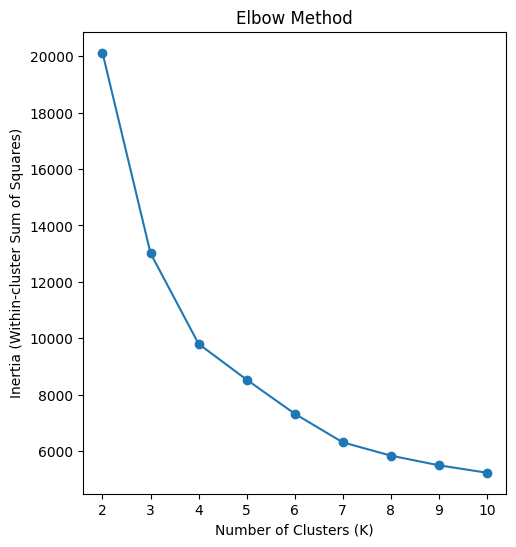

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

Step 6: Silhouette Score

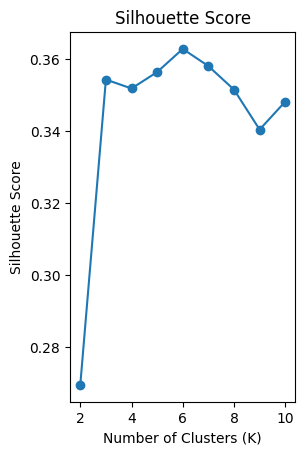

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Step 8: Interpretation

In [ ]:
# Find the K value from the Elbow Method
elbow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 4  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4


'''You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
the characteristics of the dataset'''

Linkage matrix (Z):
[[0.         1.         1.         2.        ]
 [2.         3.         1.         2.        ]
 [4.         5.         7.81024968 4.        ]]

Explanation of linkage matrix rows:
Each row represents one merge:
- Columns 0 and 1 are the indices of clusters merged
- Column 2 is the distance between clusters at merge
- Column 3 is the number of original points in the newly formed cluster



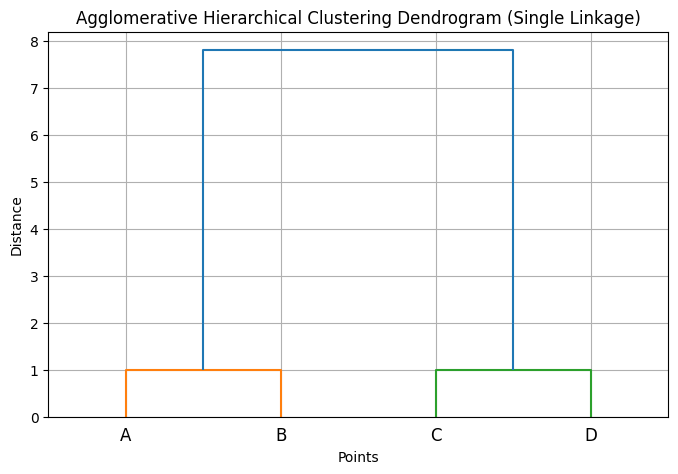


Interpretation:
---------------
- The dendrogram shows first merges at distance 1.0:
   - Points A and B are merged (distance 1.0)
   - Points C and D are merged (distance 1.0)
- Then clusters {A,B} and {C,D} merge at distance ~7.8
- This matches our manual calculation exactly.

Conclusion:
-----------
- The two closest pairs merge first.
- The large jump in distance (~7.8) before the last merge suggests that two clusters ({A,B} and {C,D}) are quite distinct.
- Cutting the dendrogram at distance < 7.8 would give two clusters: {A,B} and {C,D}.



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Define the points
# Points A, B, C, D with 2D coordinates
points = np.array([
    [1, 2],   # Point A
    [2, 2],   # Point B
    [8, 7],   # Point C
    [8, 8]    # Point D
])

# Labels for clarity in dendrogram
labels = ['A', 'B', 'C', 'D']

# Step 2: Calculate hierarchical clustering linkage matrix
# Using 'single' linkage (minimum distance between clusters)
# linkage() computes the distance matrix and merges clusters stepwise
Z = linkage(points, method='single')

# The linkage matrix Z encodes the hierarchical clustering:
# Columns in Z:
# [idx1, idx2, distance, sample_count]

# Let's print Z to interpret the clustering steps:
print("Linkage matrix (Z):")
print(Z)
print("""
Explanation of linkage matrix rows:
Each row represents one merge:
- Columns 0 and 1 are the indices of clusters merged
- Column 2 is the distance between clusters at merge
- Column 3 is the number of original points in the newly formed cluster
""")

# Step 3: Plot dendrogram to visualize the clustering process
plt.figure(figsize=(8, 5))
dendrogram(Z, labels=labels, leaf_rotation=0, leaf_font_size=12)
plt.title('Agglomerative Hierarchical Clustering Dendrogram (Single Linkage)')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Interpretation:
print("""
Interpretation:
---------------
- The dendrogram shows first merges at distance 1.0:
   - Points A and B are merged (distance 1.0)
   - Points C and D are merged (distance 1.0)
- Then clusters {A,B} and {C,D} merge at distance ~7.8
- This matches our manual calculation exactly.

Conclusion:
-----------
- The two closest pairs merge first.
- The large jump in distance (~7.8) before the last merge suggests that two clusters ({A,B} and {C,D}) are quite distinct.
- Cutting the dendrogram at distance < 7.8 would give two clusters: {A,B} and {C,D}.
""")


K-Means Clustering
Bank Transactions

Step 1: Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

Step 2: Load and Inspect the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv('/content/bank_transactions.csv')

In [ ]:
# Explore the dataset
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            20000 non-null  object 
 1   CustomerID               20000 non-null  object 
 2   CustomerDOB              19928 non-null  object 
 3   CustGender               19989 non-null  object 
 4   CustLocation             19999 non-null  object 
 5   CustAccountBalance       19973 non-null  float64
 6   TransactionDate          20000 non-null  object 
 7   TransactionTime          20000 non-null  int64  
 8   TransactionAmount (INR)  20000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.4+ MB


Step 3: Data Preprocessing

In [ ]:
# Convert the 'TransactionDate' column to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d-%m-%Y')

In [ ]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Select numeric features for clustering
numeric_features = data[['CustAccountBalance', 'TransactionAmount (INR)']]

In [ ]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,2016-08-02,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,2016-08-02,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5


In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

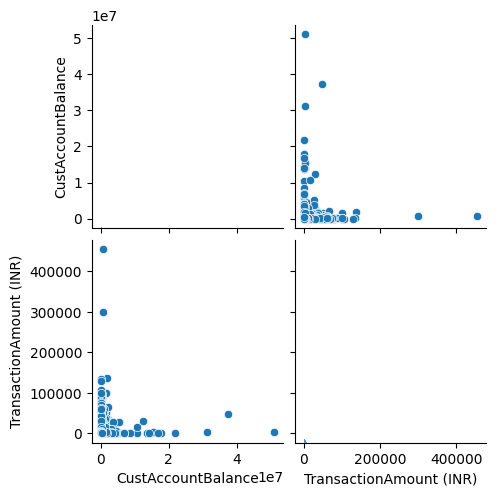

In [ ]:
# Plot a pairplot to visualize relationships between numeric features
sns.pairplot(data[['CustAccountBalance', 'TransactionAmount (INR)']])
plt.show()

Step 5: Finding the Optimal Number of Clusters (K)

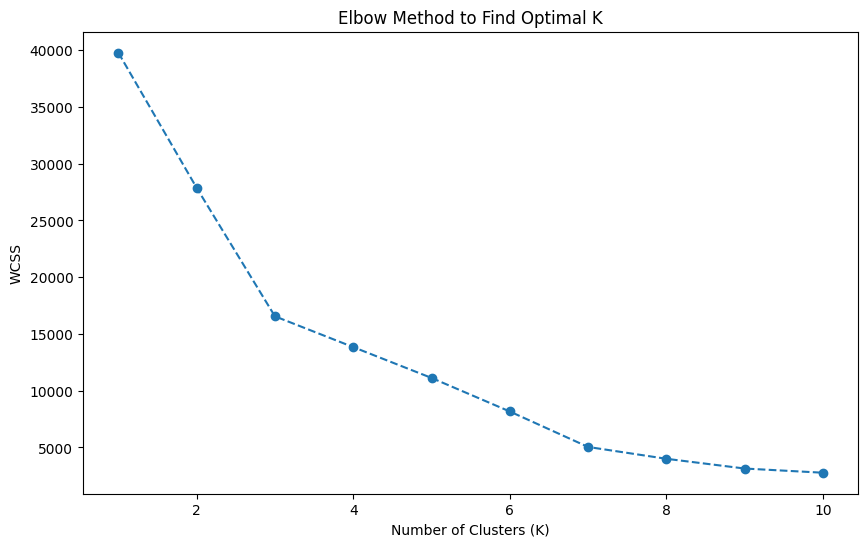

In [ ]:
# Using the Elbow Method to find the optimal number of clusters (K)
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

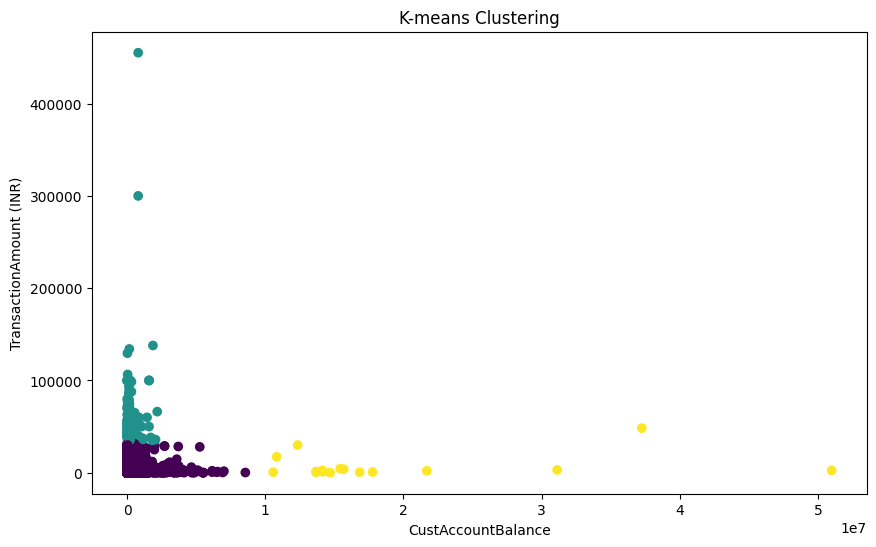

In [ ]:
# Based on the Elbow Method, choose the optimal number of clusters (K)

# Visualize and Interpret the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('K-means Clustering')
plt.show()